# Linear regression with one variable

### Based on this [Course](https://www.coursera.org/learn/machine-learning)

In this part of this exercise, you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering dierent cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.

You would like to use this data to help you select which city to expand
to next.

The file ex1data1.txt contains the dataset for our linear regression prob-
lem. The first column is the population of a city and the second column is
the profit of a food truck in that city. A negative value for prot indicates a loss.

The ex1.m script has already been set up to load this data for you.

## Basic function

In [59]:
%matplotlib inline
import numpy as np
from plotData import plotData
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from warmUpExercise import warmUpExercise
from computeCost import computeCost
from gradientDescent import gradientDescent

print('Running warmUpExercise...')
print('5x5 Identity Matrix: ');
print(warmUpExercise(5))

Running warmUpExercise...
5x5 Identity Matrix: 
[[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.]]


## Plotting

Plotting Data ...


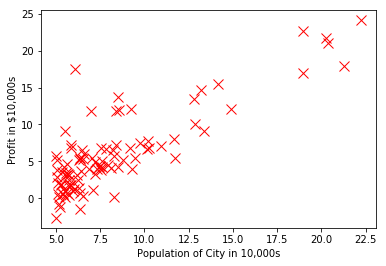

In [60]:
print('Plotting Data ...')
data = np.loadtxt('ex1data1.txt', delimiter=",")
X = data[:, 0]
y = data[:, 1]
m = len(y); # number of training examples

# Plot Data
# Note: You have to complete the code in plotData.py
plotData(X, y)

## Cost and Gradient descent

\begin{equation*}
J(\theta, \theta) = \frac{1}{2} \sum_{i=1}^m (h_\theta (X^i) - y^i))
\end{equation*}

\begin{equation*} 
repeat \{\\
\theta_j := \theta_j - \alpha \frac{\partial}{\partial\theta_j} J(\theta)\\
\}
\end{equation*}


In [67]:
X = np.c_[np.ones((m,)), data[:, 0]] # Add a column of ones to x
theta = np.zeros((2, 1)) # initialize fitting parameters

# Some gradient descent settings
iterations = 1500;
alpha = 0.01;

print('Testing the cost function...')
# compute and display initial cost
J = computeCost(X, y, theta)
print('With theta = [0 ; 0]')
print('Cost computed = ', J)
print('Expected cost value (approx) 32.07')

Testing the cost function...
With theta = [0 ; 0]
Cost computed =  [ 32.07273388]
Expected cost value (approx) 32.07


In [62]:
print('Running Gradient Descent...')
# run gradient descent
theta, j_history = gradientDescent(X, y, theta, alpha, iterations)

# print theta to screen
print('Theta found by gradient descent: ', theta[0], theta[1])
print('Expected theta values (approx)\n -3.6303\n  1.1664\n\n')

Running Gradient Descent...
Theta found by gradient descent:  [-3.63029144] [ 1.16636235]
Expected theta values (approx)
 -3.6303
  1.1664




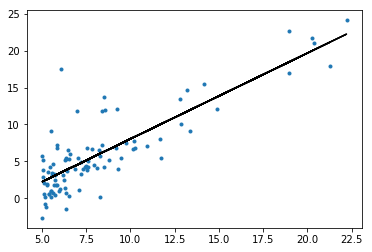

In [63]:
plt.figure()
plt.plot(data[:, 0], data[:, 1], '.')
plt.plot(data[:, 0], X.dot(theta), 'k-')
plt.show()

## Prediction example

Predict values for population sizes of 35,000 and 70,000

In [64]:
predict1 = np.array([1, 3.5]).dot(theta)
print("For population = 35,000, we predict a profit of {:f}".format( float(predict1*10000) ))
predict2 = np.array([1, 7]).dot(theta)
print('For population = 70,000, we predict a profit of {:f}'.format( float(predict2*10000) ))

For population = 35,000, we predict a profit of 4519.767868
For population = 70,000, we predict a profit of 45342.450129


## Visualizing
### \begin{align} \mathbf{J}(\theta_0, \theta_1) \end{align}

Text(0.5,0,'theta_1')

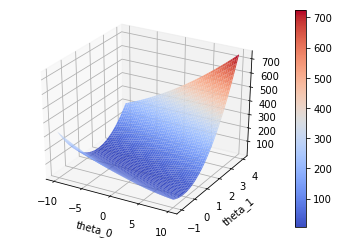

In [65]:
# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# Fill out J_vals
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = [[theta0_vals[i]], [theta1_vals[j]]]
        J_vals[i,j] = computeCost(X, y, t)

# Because of the way meshgrids work in the surf command, we need to 
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = np.transpose(J_vals)

fig = plt.figure()
ax = fig.gca(projection='3d')
theta0_vals, theta1_vals = np.meshgrid(theta0_vals, theta1_vals)
surf = ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap=cm.coolwarm, rstride=2, cstride=2)
fig.colorbar(surf)
plt.xlabel('theta_0')
plt.ylabel('theta_1')

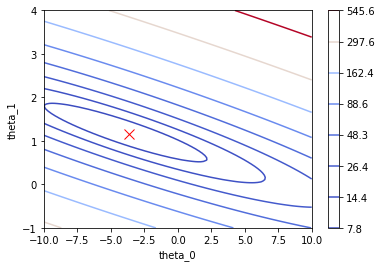

In [66]:
fig = plt.figure()

# Plot J_vals as 20 contours spaced logarithmically between 0.01 and 100
cset = plt.contour(theta0_vals, theta1_vals, J_vals, np.logspace(-2, 3, 20), cmap=cm.coolwarm)
fig.colorbar(cset)
plt.xlabel('theta_0')
plt.ylabel('theta_1')
plt.plot(theta[0,0], theta[1,0], 'rx', markersize=10, linewidth=2)